In [1]:
# pip install psycopg2

In [10]:
import psycopg2
import pandas as pd

In [11]:
host = "np-ado-asg2-jairzhou.postgres.database.azure.com"
port = 5432
dbname = "postgres"
username = "admin1@np-ado-asg2-jairzhou"
pwd = "jair_zhou1"

table = "newspaperchurn"

In [13]:
with psycopg2.connect("host='{}' port={} dbname='{}' user={} password={}".format(host, port, dbname, username, pwd)) as conn:
    sql = "select * from {};".format(table)
    df = pd.read_sql_query(sql, conn)

In [14]:
df.head()

,city,state,county,address,language,zip_code,age_range,ethnicity,hh_income,subscriber,...,home_ownership,reward_program,source_channel,subscriptionid,year_of_residence,dummy_for_children,_airbyte_ab_id,_airbyte_emitted_at,_airbyte_normalized_at,_airbyte_newspaperchurn_hashid
0,LONG BEACH,CA,LOS ANGELES,1 3RD PL UNIT 703,German,90802,25-29,German,"$ 30,000 - $39,999",NO,...,RENTER,0.0,CircAdm,180590686.0,1,N,11747335-7716-41a5-ad7b-f41348071329,2023-01-25 07:54:35.776000+00:00,2023-01-25 07:55:48.060015+00:00,aea61301493f47d68f110f77bef0242e
1,NEWPORT COAST,CA,ORANGE,1 AVIGNON,,92657,50-54,unknown,"$500,000 Plus",YES,...,OWNER,0.0,Partner,181401653.0,14,Y,04c72ef5-6143-430c-8fe7-f1ac16c68dd5,2023-01-25 07:54:35.776000+00:00,2023-01-25 07:55:48.060015+00:00,67695170f43f1c8138298a1b9e120ff2
2,IRVINE,CA,ORANGE,1 BLACKSWAN,English,92604,45-49,Italian,"$100,000 - $124,999",YES,...,OWNER,0.0,Partner,180374685.0,7,Y,605afcbc-b046-408a-b976-bf5946abe179,2023-01-25 07:54:35.776000+00:00,2023-01-25 07:55:48.060015+00:00,f5823c9f0792b1ef506b5e508ed7eb6e
3,LAGUNA NIGUEL,CA,ORANGE,1 BLUE HORIZON,English,92677,55-59,English,"$200,000 - $249,999",NO,...,OWNER,1.0,Internet,180703483.0,23,N,08244407-b2bf-4d96-9372-c54008f90e19,2023-01-25 07:54:35.776000+00:00,2023-01-25 07:55:48.060015+00:00,3522c1f0e0bd20e5c590f89dc4489e6f
4,RANCHO SANTA MARGARITA,CA,ORANGE,1 BRISA DEL LAGO,English,92688,60-64,Italian,"$ 50,000 - $59,999",YES,...,OWNER,0.0,Crew,180358906.0,23,N,44148411-a900-4fe5-9dc2-a9034891ab4e,2023-01-25 07:54:35.776000+00:00,2023-01-25 07:55:48.060015+00:00,ce9b62cc9a8ac97b050e8d43710740d3


In [15]:
# drop irrelevant data
df.drop(list(df.filter(regex = '_airbyte_')), axis = 1, inplace = True)
df.head()

,city,state,county,address,language,zip_code,age_range,ethnicity,hh_income,subscriber,weekly_fee,nielsen_prizm,deliveryperiod,home_ownership,reward_program,source_channel,subscriptionid,year_of_residence,dummy_for_children
0,LONG BEACH,CA,LOS ANGELES,1 3RD PL UNIT 703,German,90802,25-29,German,"$ 30,000 - $39,999",NO,$7.00 - $7.99,FM,7Day,RENTER,0.0,CircAdm,180590686.0,1,N
1,NEWPORT COAST,CA,ORANGE,1 AVIGNON,,92657,50-54,unknown,"$500,000 Plus",YES,$0.01 - $0.50,MW,SunOnly,OWNER,0.0,Partner,181401653.0,14,Y
2,IRVINE,CA,ORANGE,1 BLACKSWAN,English,92604,45-49,Italian,"$100,000 - $124,999",YES,$0.01 - $0.50,MW,SunOnly,OWNER,0.0,Partner,180374685.0,7,Y
3,LAGUNA NIGUEL,CA,ORANGE,1 BLUE HORIZON,English,92677,55-59,English,"$200,000 - $249,999",NO,$1.00 - $1.99,MW,SunOnly,OWNER,1.0,Internet,180703483.0,23,N
4,RANCHO SANTA MARGARITA,CA,ORANGE,1 BRISA DEL LAGO,English,92688,60-64,Italian,"$ 50,000 - $59,999",YES,$8.00 - $8.99,MM,Thu-Sun,OWNER,0.0,Crew,180358906.0,23,N


In [16]:
df.isnull().sum()

city                  0
state                 0
county                0
address               0
language              0
zip_code              0
age_range             0
ethnicity             0
hh_income             0
subscriber            0
weekly_fee            0
nielsen_prizm         0
deliveryperiod        0
home_ownership        0
reward_program        0
source_channel        0
subscriptionid        0
year_of_residence     0
dummy_for_children    0
dtype: int64

In [17]:
cat_cols = [c for c in df.columns if df[c].dtype == "O"]
cat_cols

['city',
 'state',
 'county',
 'address',
 'language',
 'age_range',
 'ethnicity',
 'hh_income',
 'subscriber',
 'weekly_fee',
 'nielsen_prizm',
 'deliveryperiod',
 'home_ownership',
 'source_channel',
 'dummy_for_children']

In [18]:
def encode(train, test, variable, mapping):
    ''' a function to help map and encode when using pandas '''
    train[variable] = train[variable].map(mapping)
    test[variable] = test[variable].map(mapping)
    return train,test

In [19]:
def meanTV(X_train,X_test, y_train):
    from feature_engine.encoding import MeanEncoder
    mean_enc = MeanEncoder(variables=None)
    mean_enc.fit(X_train, y_train)
    xtra = mean_enc.transform(X_train)
    xtes = mean_enc.transform(X_test)
    
    return xtra , xtes

In [20]:
# as of now fill all NaNs w/ 0
df = df.fillna(0)
df = df.drop(columns = "subscriptionid")

In [21]:
df.head()

,city,state,county,address,language,zip_code,age_range,ethnicity,hh_income,subscriber,weekly_fee,nielsen_prizm,deliveryperiod,home_ownership,reward_program,source_channel,year_of_residence,dummy_for_children
0,LONG BEACH,CA,LOS ANGELES,1 3RD PL UNIT 703,German,90802,25-29,German,"$ 30,000 - $39,999",NO,$7.00 - $7.99,FM,7Day,RENTER,0.0,CircAdm,1,N
1,NEWPORT COAST,CA,ORANGE,1 AVIGNON,,92657,50-54,unknown,"$500,000 Plus",YES,$0.01 - $0.50,MW,SunOnly,OWNER,0.0,Partner,14,Y
2,IRVINE,CA,ORANGE,1 BLACKSWAN,English,92604,45-49,Italian,"$100,000 - $124,999",YES,$0.01 - $0.50,MW,SunOnly,OWNER,0.0,Partner,7,Y
3,LAGUNA NIGUEL,CA,ORANGE,1 BLUE HORIZON,English,92677,55-59,English,"$200,000 - $249,999",NO,$1.00 - $1.99,MW,SunOnly,OWNER,1.0,Internet,23,N
4,RANCHO SANTA MARGARITA,CA,ORANGE,1 BRISA DEL LAGO,English,92688,60-64,Italian,"$ 50,000 - $59,999",YES,$8.00 - $8.99,MM,Thu-Sun,OWNER,0.0,Crew,23,N


In [22]:
#encoding

In [23]:
churn = {"YES" : 0, "NO" : 1}
child = {"Y" : 1, "N" : 0}

In [24]:
df["churn"] = df["subscriber"]

df["churn"] = df["churn"].map(churn)

df = df.drop(columns = ["subscriber","address"], axis =1)
df.head()

,city,state,county,language,zip_code,age_range,ethnicity,hh_income,weekly_fee,nielsen_prizm,deliveryperiod,home_ownership,reward_program,source_channel,year_of_residence,dummy_for_children,churn
0,LONG BEACH,CA,LOS ANGELES,German,90802,25-29,German,"$ 30,000 - $39,999",$7.00 - $7.99,FM,7Day,RENTER,0.0,CircAdm,1,N,1
1,NEWPORT COAST,CA,ORANGE,,92657,50-54,unknown,"$500,000 Plus",$0.01 - $0.50,MW,SunOnly,OWNER,0.0,Partner,14,Y,0
2,IRVINE,CA,ORANGE,English,92604,45-49,Italian,"$100,000 - $124,999",$0.01 - $0.50,MW,SunOnly,OWNER,0.0,Partner,7,Y,0
3,LAGUNA NIGUEL,CA,ORANGE,English,92677,55-59,English,"$200,000 - $249,999",$1.00 - $1.99,MW,SunOnly,OWNER,1.0,Internet,23,N,1
4,RANCHO SANTA MARGARITA,CA,ORANGE,English,92688,60-64,Italian,"$ 50,000 - $59,999",$8.00 - $8.99,MM,Thu-Sun,OWNER,0.0,Crew,23,N,0


In [25]:
from sklearn.model_selection import train_test_split
xtra,xtes,ytra,ytes = train_test_split(df.drop("churn", axis = 1),df["churn"], test_size = 0.2,
                                      random_state = 404)

In [26]:
(xtra, xtes) = encode(xtra,xtes,"dummy_for_children",child)

In [27]:
(xtra,xtes) = meanTV(xtra,xtes,ytra)

C:\Users\Kayen\anaconda3\lib\site-packages\feature_engine\encoding\base_encoder.py:193: UserWarning: During the encoding, NaN values were introduced in the feature(s) language, ethnicity, deliveryperiod, source_channel.
  warnings.warn(


In [28]:
xtra.isnull().sum()

city                  0
state                 0
county                0
language              0
zip_code              0
age_range             0
ethnicity             0
hh_income             0
weekly_fee            0
nielsen_prizm         0
deliveryperiod        0
home_ownership        0
reward_program        0
source_channel        0
year_of_residence     0
dummy_for_children    0
dtype: int64

In [29]:
xtes.isnull().sum()

city                  0
state                 0
county                0
language              5
zip_code              0
age_range             0
ethnicity             1
hh_income             0
weekly_fee            0
nielsen_prizm         0
deliveryperiod        2
home_ownership        0
reward_program        0
source_channel        3
year_of_residence     0
dummy_for_children    0
dtype: int64

In [30]:
xtes = xtes.fillna(0)

In [31]:
# modelling

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf = RandomForestClassifier(random_state = 404)

param_grid = { 
    'n_estimators': [10,20,30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [33]:
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(xtra,ytra)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=404),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30]})

In [34]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 30}

In [23]:
# yall MUST change here
print(

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_14764/690934872.py, line 2)

In [35]:
rfm = RandomForestClassifier(criterion = "entropy", max_depth = 8,
                             max_features = "auto", n_estimators = 30,
                             random_state = 404)

rfm.fit(xtra,ytra)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=30,
                       random_state=404)

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

y_train_preds = rfm.predict(xtra)
y_test_preds = rfm.predict(xtes)

In [37]:
print(classification_report(ytes, y_test_preds))

              precision    recall  f1-score   support

           0       0.68      0.31      0.43       608
           1       0.86      0.97      0.91      2563

    accuracy                           0.84      3171
   macro avg       0.77      0.64      0.67      3171
weighted avg       0.82      0.84      0.82      3171



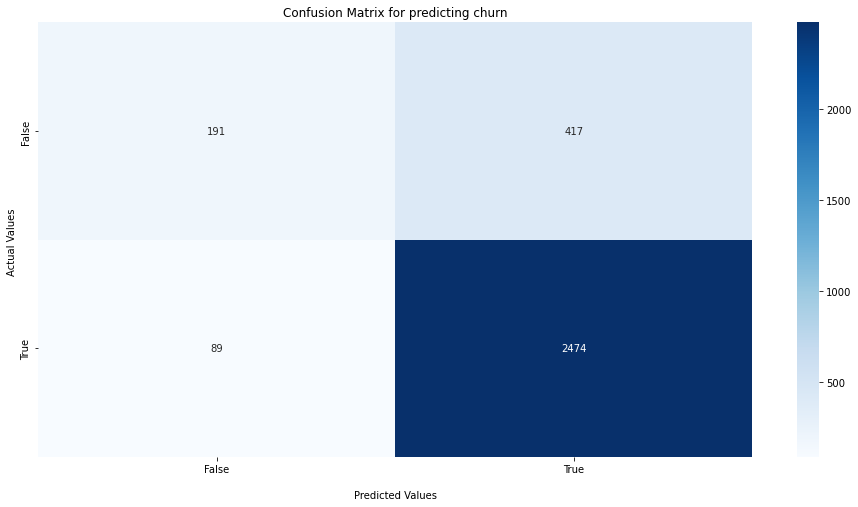

In [38]:
cf_matrix = confusion_matrix(ytes, y_test_preds)

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (16,8))

sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', ax=ax)

ax.set_title('Confusion Matrix for predicting churn');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()